In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df=pd.read_csv('tmdb-movies.csv')

In [3]:
df[df.duplicated() == True].shape

(1, 21)

In [4]:
df.drop_duplicates(inplace=True)


In [5]:
x=['cast','director','production_companies','genres']

In [6]:
for m in x:
    df = df.dropna(subset = ['{}'.format(m)])
df.drop_duplicates(inplace=True)

In [7]:
df[df['genres'].isnull()].shape


(0, 21)

In [8]:
df.query("(budget_adj == 0) | (revenue_adj == 0)").shape


(5967, 21)

In [9]:
df = df[df['budget_adj'] > 0]
df = df[df['revenue_adj'] > 0]

In [10]:
df.query("(budget_adj == 0) | (revenue_adj == 0)").shape


(0, 21)

In [11]:
## release_year  to str
df['release_year'] = df['release_year'].apply(str)
df['genres'] = df['genres'].apply(str)
df['cast'] = df['cast'].apply(str)


In [12]:
df['budget_adj']=df['budget_adj'].apply(lambda x: '%.0f' % x)
df['revenue_adj']=df['revenue_adj'].apply(lambda x: '%.0f' % x)


In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [14]:
df.drop(['id','imdb_id','budget','revenue'],axis=1,inplace=True)

In [112]:
df['cast'][10000]
    

'Jonathan Brandis|Kenny Morrison|Clarissa Burt|John Wesley Shipp|Martin Umbach'

In [16]:
df['revenue_adj']=pd.to_numeric(df['revenue_adj'], downcast='integer')
df['budget_adj']=pd.to_numeric(df['budget_adj'], downcast='integer')


In [17]:
cast_set = set()

for cast in df['cast'].iteritems():
    for actoer in cast[1].split('|'):
        cast_set.add(actoer)

cast_set = sorted(cast_set)

cast_set

['50 Cent',
 'A Martinez',
 'A. Michael Baldwin',
 'A.J. Cook',
 'AJ Bowen',
 'Aaliyah',
 'Aamir Khan',
 'Aaran Thomas',
 'Aaron Abrams',
 'Aaron Burns',
 'Aaron Eckhart',
 'Aaron Hughes',
 'Aaron Jeffery',
 'Aaron Paul',
 'Aaron Ruell',
 'Aaron Stanford',
 'Aaron Taylor-Johnson',
 'Aaron Wolff',
 'Aaron Yoo',
 'Aasif Mandvi',
 'Abbie Cornish',
 'Abhishek Bachchan',
 'Abigail Bianca',
 'Abigail Breslin',
 'Abigail Canton',
 'Abigail Hargrove',
 'Abraham Attah',
 'Adam Alexi-Malle',
 'Adam Arkin',
 'Adam Baldwin',
 'Adam Barnett',
 'Adam Beach',
 'Adam Boyd',
 'Adam Brody',
 'Adam Campbell',
 'Adam David Thompson',
 'Adam Deacon',
 'Adam Driver',
 'Adam G. Sevani',
 'Adam Garcia',
 'Adam Goldberg',
 'Adam Herschman',
 'Adam James',
 'Adam Lamberg',
 'Adam Levine',
 'Adam Pascal',
 'Adam Rayner',
 'Adam RodrÃ\xadguez',
 'Adam Ryen',
 'Adam Sandler',
 'Adam Scott',
 'Adam Trese',
 'Addison Timlin',
 'Adeel Akhtar',
 'Adelaide Clemens',
 'Adelaide Kane',
 'Adewale Akinnuoye-Agbaje',
 'Adil

In [18]:
for actoer in cast_set:
    df[actoer] = df['cast'].str.contains(actoer)

# Adjust the column slice so we can see some of the added individual genre columns
df.iloc[:, 15:].head()

,budget_adj,revenue_adj,50 Cent,A Martinez,A. Michael Baldwin,A.J. Cook,AJ Bowen,Aaliyah,Aamir Khan,Aaran Thomas,...,Zoie Palmer,Zooey Deschanel,ZoÃ« Bell,ZoÃ« Borde,ZoÃ« Kravitz,Zuleikha Robinson,Ãngela Molina,Ã“lafur Darri Ã“lafsson,Äá»— Thá»‹ Háº£i Yáº¿n,à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ
0,137999939,1392445893,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,137999939,348161292,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,101199955,271619025,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,183999919,1902723130,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,174799923,1385748801,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
cast_rev_adj_mean_dict = {
    'mean_revenue_adj': {}
}

# For each genre and associated mean adjusted revenue, add a key/value to the 'mean_revenue_adj' column
for actoer in cast_set:
    mean_rev_adj = df[df[actoer]]['revenue_adj'].mean()
    cast_rev_adj_mean_dict['mean_revenue_adj'][actoer] = mean_rev_adj

# Create and sort the data frame
df_mean_rev_adj_genre = pd.DataFrame.from_dict(cast_rev_adj_mean_dict)
df_mean_rev_adj_genre.sort_values(by=['mean_revenue_adj'], inplace=True)

top_20_actoers=df_mean_rev_adj_genre.nlargest(20,['mean_revenue_adj'])
top_20_actoers

,mean_revenue_adj
Jason Miller,2167324901.00
Daisy Ridley,1902723130.00
Robert MacNaughton,1791694309.00
Ken Howard,1583049536.00
Wendy Gazelle,1583049536.00
Ben Wright,1574814740.00
J. Pat O'Malley,1574814740.00
Betty Lou Gerson,1574814740.00
Martha Wentworth,1574814740.00
Mark Hamill,1475871964.80


<ipython-input-87-7ed1701b7a82>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


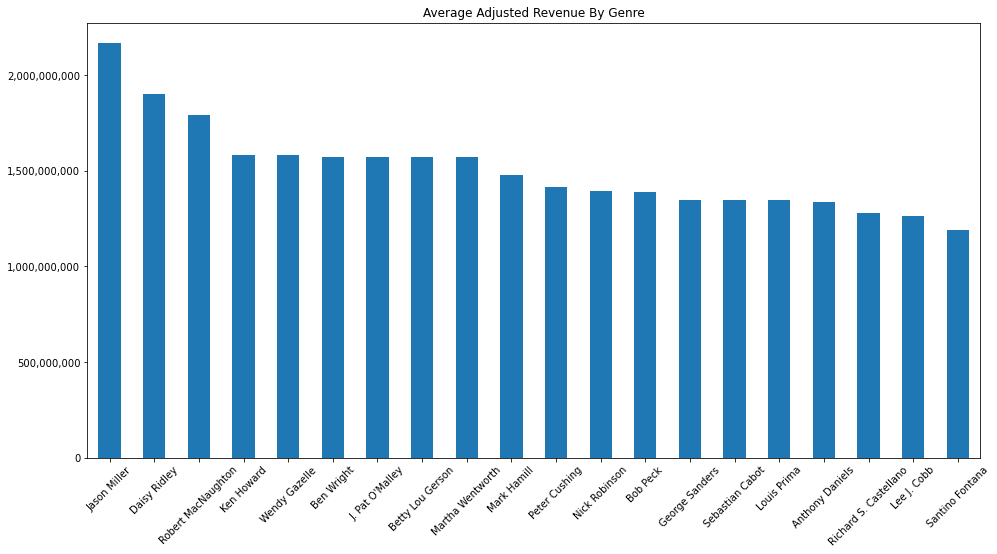

In [87]:
ax = top_20_actoers.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation = 45);

In [20]:
genres_set = set()

for genres in df['genres'].iteritems():
    for genre in genres[1].split('|'):
        genres_set.add(genre)

genres_set = sorted(genres_set)

genres_set

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [21]:
for genre in genres_set:
    df[genre] = df['genres'].str.contains(genre)

# Adjust the column slice so we can see some of the added individual genre columns
df.iloc[:, 13:].head()

,vote_average,release_year,budget_adj,revenue_adj,50 Cent,A Martinez,A. Michael Baldwin,A.J. Cook,AJ Bowen,Aaliyah,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,6.50,2015,137999939,1392445893,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,7.10,2015,137999939,348161292,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,6.30,2015,101199955,271619025,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,7.50,2015,183999919,1902723130,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,7.30,2015,174799923,1385748801,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
dfmovies=df[['original_title','budget_adj']]
dfmovies.set_index('original_title', inplace=True)
top_20_budget=dfmovies.nlargest(20,['budget_adj'])
top_20_budget

,budget_adj
original_title,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,368371256
Pirates of the Caribbean: At World's End,315500575
Superman Returns,292050673
Titanic,271692064
Spider-Man 3,271330494
Tangled,260000000
Avengers: Age of Ultron,257599887
Harry Potter and the Half-Blood Prince,254100109


<ipython-input-43-6ecc185c6005>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


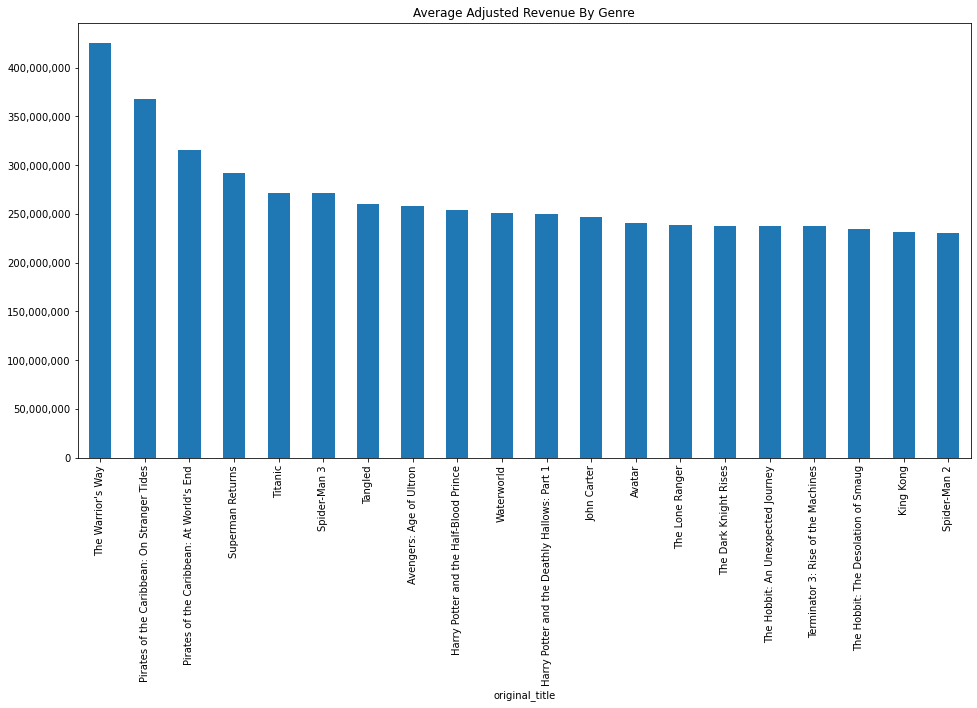

In [43]:
ax = top_20_budget.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

In [91]:
dfmovies=df[['original_title','revenue_adj']]
dfmovies.set_index('original_title', inplace=True)
top_20_revenue=dfmovies.nlargest(20,['revenue_adj'])

<ipython-input-92-1569b43d3e35>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


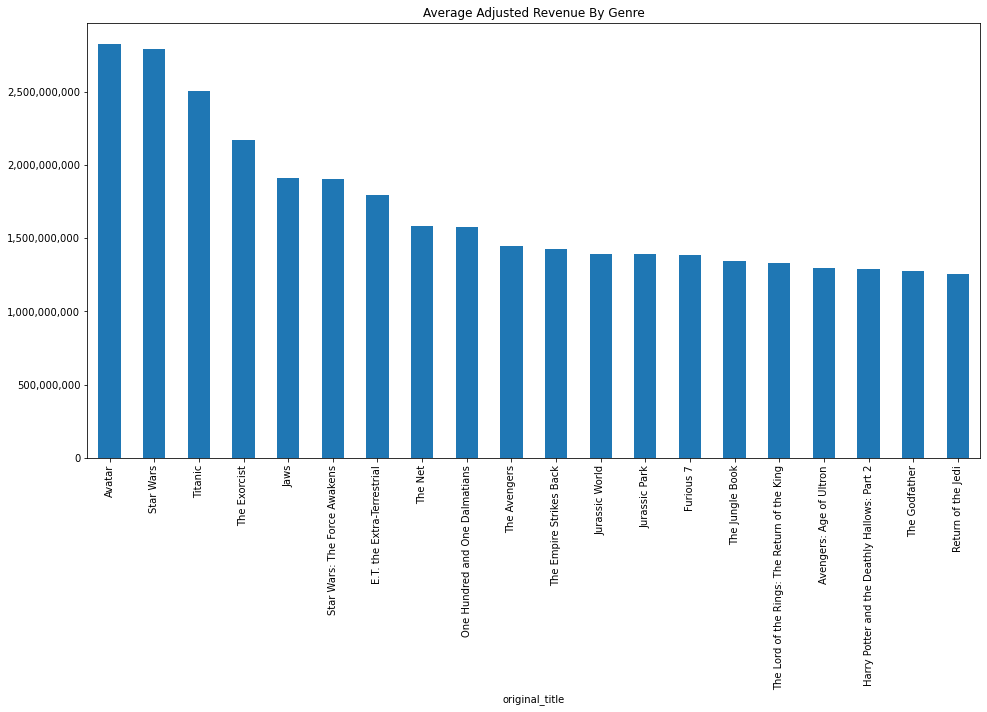

In [92]:
ax = top_20_revenue.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

In [97]:
dfmovies=df[['original_title','revenue_adj','runtime']]
dfmovies.set_index('original_title', inplace=True)
top_20_revenue=dfmovies.nlargest(20,['revenue_adj'])
top_20_revenue

,revenue_adj,runtime
original_title,,
Avatar,2827123750,162
Star Wars,2789712242,121
Titanic,2506405735,194
The Exorcist,2167324901,122
Jaws,1907005842,124
Star Wars: The Force Awakens,1902723130,136
E.T. the Extra-Terrestrial,1791694309,115
The Net,1583049536,114
One Hundred and One Dalmatians,1574814740,79


In [100]:
top_20_revenue['runtime'].mean()

134.1

In [88]:
dfmovies=df[['original_title','vote_average']]
dfmovies.set_index('original_title', inplace=True)
top_20_vote=dfmovies.nlargest(20,['vote_average'])

<ipython-input-89-fe52ca23f1d4>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


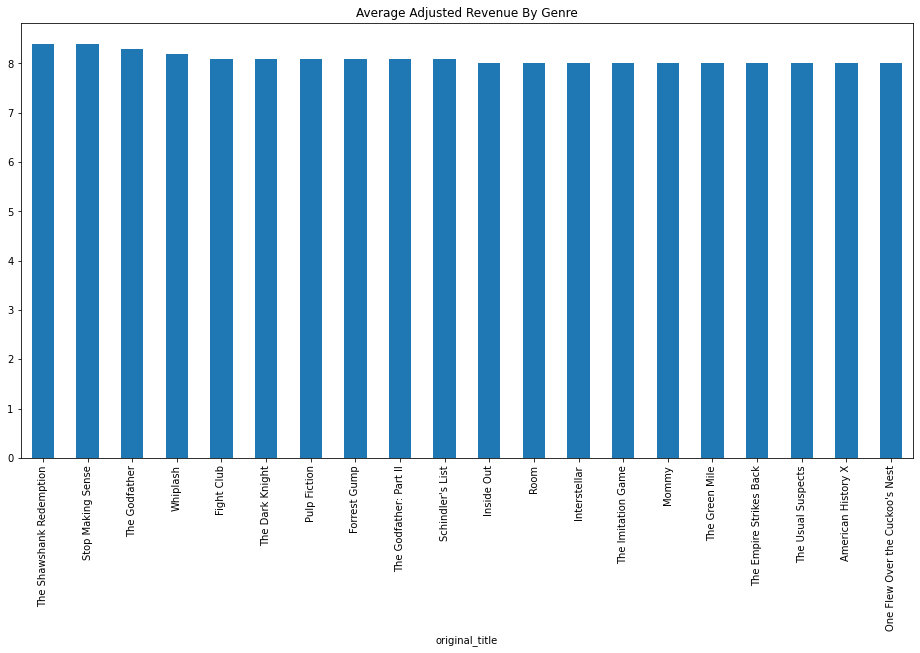

In [89]:
ax = top_20_vote.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


vote_average   2.20
dtype: float64

In [51]:
# This dictionary will be used to create a new data frame
genre_rev_adj_means_dict = {
    'mean_revenue_adj': {}
}

# For each genre and associated mean adjusted revenue, add a key/value to the 'mean_revenue_adj' column
for genre in genres_set:
    mean_rev_adj = df[df[genre]]['revenue_adj'].mean()
    genre_rev_adj_means_dict['mean_revenue_adj'][genre] = mean_rev_adj

# Create and sort the data frame
df_mean_rev_adj_genre = pd.DataFrame.from_dict(genre_rev_adj_means_dict)
df_mean_rev_adj_genre.sort_values(by=['mean_revenue_adj'], inplace=True)

typ=df_mean_rev_adj_genre.nlargest(20,['mean_revenue_adj'])

<ipython-input-77-06bf364529b4>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


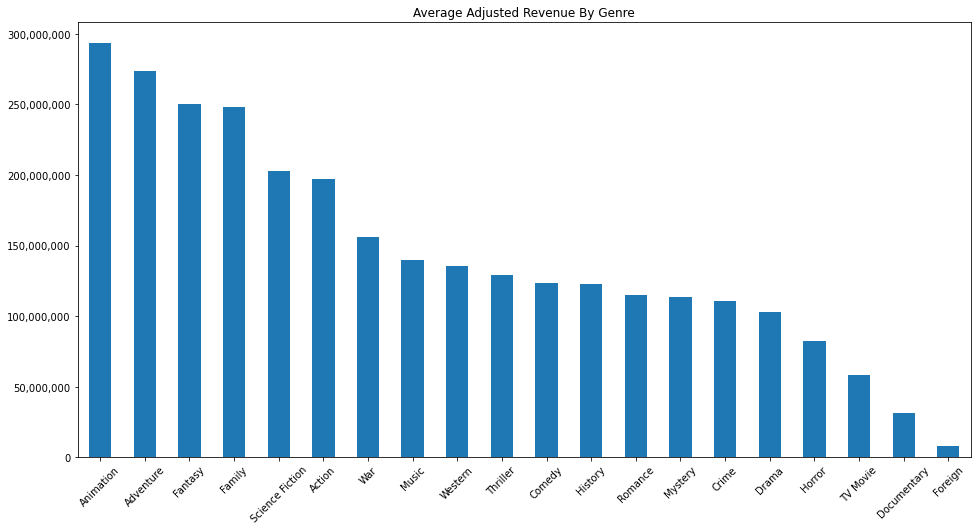

In [77]:
ax = typ.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation = 45);


In [27]:
production_companies_set = set()

for companies in df['production_companies'].iteritems():
    for company in companies[1].split('|'):
        production_companies_set.add(company)

production_companies_set = sorted(production_companies_set)

production_companies_set

['"DIA" Productions GmbH & Co. KG',
 '1019 Entertainment',
 '10th Hole Productions',
 '11:11 Mediaworks',
 '120dB Films',
 '1492 Pictures',
 '1818',
 '1821 Pictures',
 '1984 Private Defense Contractors',
 '2 Bridges Productions',
 '2 Entertain',
 '2 Loop Films',
 '20th Century Fox',
 '20th Century Fox Home Entertainment',
 '20th Century Fox Russia',
 '20th Century Fox Television',
 '21 Laps Entertainment',
 '21st Century Film Corporation',
 '2262730 Ontario',
 '26 Films',
 '27 Films Production',
 '2929 Productions',
 '2S Films',
 '3 Arts Entertainment',
 '3 in the Box',
 '3311 Productions',
 '360 Pictures',
 '3Foot7',
 '3L Filmverleih',
 '40 Acres & A Mule Filmworks',
 '403 Productions',
 '4M',
 '5150 Action',
 '80 Days Productions',
 '87Eleven',
 '8:38 Productions',
 '98 MPH Productions',
 'A Band Apart',
 'A Bigger Boat',
 'A Grand Elephant',
 'A Hot Dog',
 'A Loopy Production LLC',
 'A&B Producoes',
 'A&E Television Networks',
 'A&M Films',
 'A-Team',
 'A113',
 'A2 Entertainment Gro

In [28]:
for company in production_companies_set:
    df[company] = df['production_companies'].str.contains(company)


    mean_rev_adj = df[df[company]]['revenue_adj'].mean()


D:\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [58]:
# This dictionary will be used to create a new data frame
company_rev_adj_means_dict = {
    'mean_revenue_adj': {}
}

# For each genre and associated mean adjusted revenue, add a key/value to the 'mean_revenue_adj' column
for company in production_companies_set:
    mean_rev_adj = df[df[company]]['revenue_adj'].mean()
    company_rev_adj_means_dict['mean_revenue_adj'][company] = mean_rev_adj

# Create and sort the data frame
df_mean_rev_adj_company = pd.DataFrame.from_dict(company_rev_adj_means_dict)
df_mean_rev_adj_company.sort_values(by=['mean_revenue_adj'], inplace=True)

top_20_df_mean_company=df_mean_rev_adj_company.nlargest(20,['mean_revenue_adj'])
top_20_df_mean_company

,mean_revenue_adj
Hoya Productions,2167324901.00
Truenorth Productions,1902723130.00
Alfran Productions,1277913732.00
Argyle Enterprises,1129534862.00
Julia Phillips and Michael Phillips Productions,1092964989.00
Second Mate Productions,1081672430.00
MIRACLE Productions GmbH & Co. KG,1062775601.00
Disney Enterprises,1024886690.00
Patalex IV Productions Limited,1000352539.00
Lightstorm Entertainment,989935077.43


<ipython-input-76-3e337da71e8d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


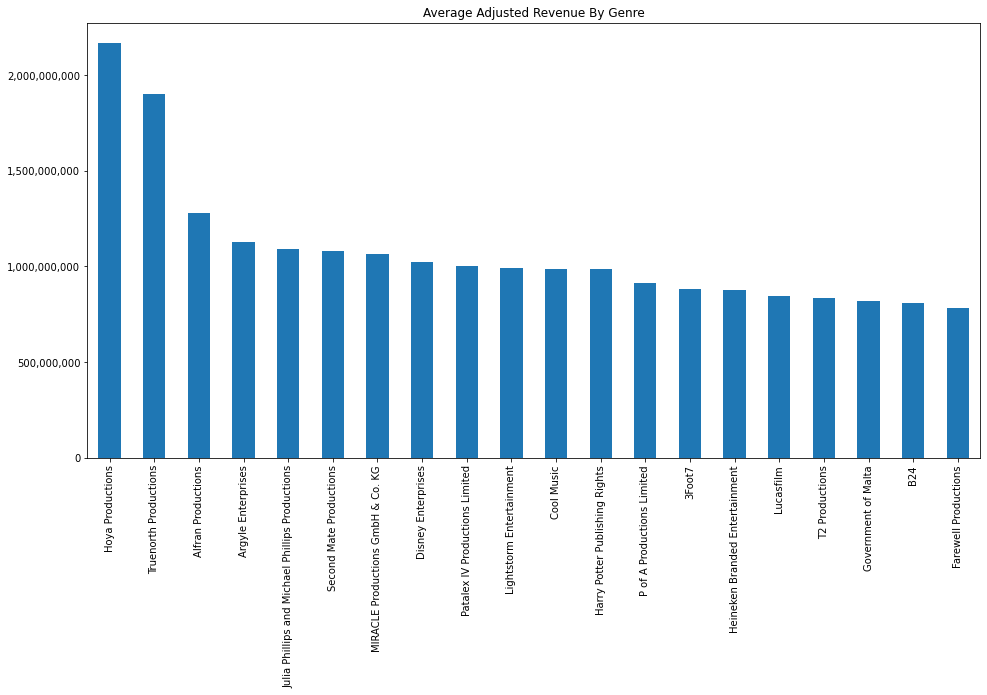

In [76]:
ax = top_20_df_mean_company.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


In [30]:
director_set = set()

for directors in df['director'].iteritems():
    for director in directors[1].split('|'):
        director_set.add(director)

director_set = sorted(director_set)

director_set

[' FrÃ©dÃ©ric Jardin',
 'Aaron Blaise',
 'Aaron Seltzer',
 'Abbas Tyrewala',
 'Abe Sylvia',
 'Abel Ferrara',
 'Adam Green',
 'Adam Marcus',
 'Adam McKay',
 'Adam Rifkin',
 'Adam Shankman',
 'Adam Wingard',
 'Adrian Lyne',
 'Adrienne Shelly',
 'Agnieszka Wojtowicz-Vosloo',
 'AgustÃ\xadn DÃ\xadaz Yanes',
 'Akiva Goldsman',
 'Akiva Schaffer',
 'Alan J. Pakula',
 'Alan Mak',
 'Alan Myerson',
 'Alan Parker',
 'Alan Poul',
 'Alan Shapiro',
 'Alan Taylor',
 'Alastair Fothergill',
 'Albert Hughes',
 'Albert Magnoli',
 'Albert Pyun',
 'Alejandro Agresti',
 'Alejandro AmenÃ¡bar',
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
 'Alejandro Monteverde',
 'Aleksander Bach',
 'Alex Cox',
 'Alex Garland',
 'Alex Gibney',
 'Alex Kendrick',
 'Alex Kurtzman',
 'Alex Proyas',
 'Alex Rivera',
 'Alexander Mackendrick',
 'Alexander Payne',
 'Alexander Witt',
 'Alexandre Aja',
 'Alexandre Rockwell',
 'Alfonso ArÃ¡u',
 'Alfonso CuarÃ³n',
 'Alfred Hitchcock',
 'Alister Grierson',
 'Allen Hughes',
 'Allison Anders',
 'Amma 

In [31]:
for director in director_set:
    df[director] = df['director'].str.contains(director)


    mean_rev_adj = df[df[director]]['revenue_adj'].mean()

In [62]:
# This dictionary will be used to create a new data frame
director_rev_adj_means_dict = {
    'mean_revenue_adj': {}
}

# For each genre and associated mean adjusted revenue, add a key/value to the 'mean_revenue_adj' column
for director in director_set:
    mean_rev_adj = df[df[director]]['revenue_adj'].mean()
    director_rev_adj_means_dict['mean_revenue_adj'][director] = mean_rev_adj

# Create and sort the data frame
df_mean_rev_adj_director = pd.DataFrame.from_dict(director_rev_adj_means_dict)
df_mean_rev_adj_director.sort_values(by=['mean_revenue_adj'], inplace=True)

top_20_directors=df_mean_rev_adj_director.nlargest(20,['mean_revenue_adj'])
top_20_directors

,mean_revenue_adj
Irwin Winkler,1583049536.00
Clyde Geronimi,1574814740.00
Hamilton Luske,1574814740.00
Richard Marquand,1253818981.00
Jennifer Lee,1192711491.00
George Lucas,1052319860.33
David Yates,1044363814.75
Joss Whedon,926407996.33
James Cameron,915902607.25
Lee Unkrich,854017658.25


<ipython-input-74-ebd2f5659b2a>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


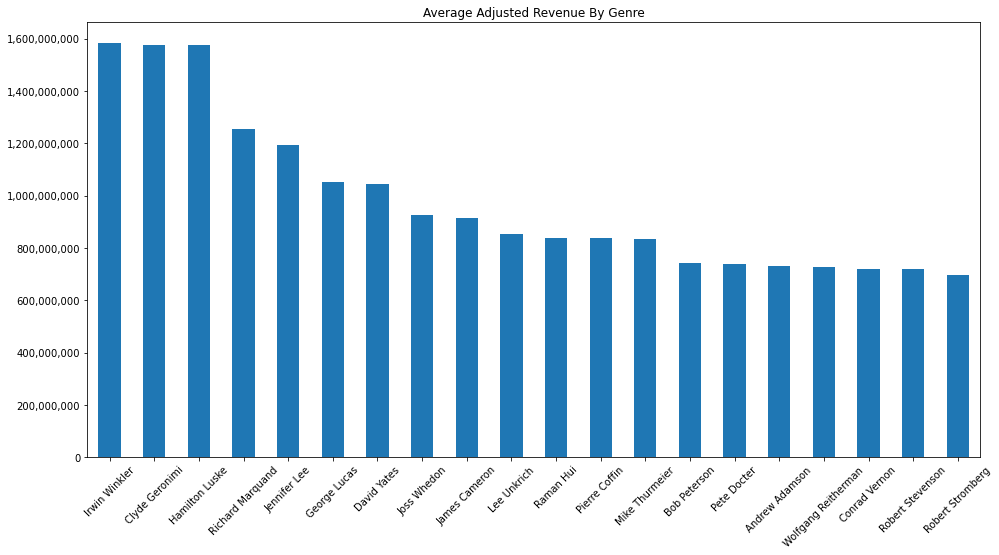

In [74]:
ax = top_20_directors.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation = 45);


In [33]:
release_year_set = sorted(set(df['release_year']))
release_year_set

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [64]:
# This dictionary will be used to create a new data frame
release_year_rev_adj_means_dict = {
    'mean_revenue_adj': {}
}

# For each release year and associated mean adjusted revenue, add a key/value to the 'mean_revenue_adj' column
for year in release_year_set:
    mean_rev_adj = df[df['release_year'] == year]['revenue_adj'].mean()
    release_year_rev_adj_means_dict['mean_revenue_adj'][year] = mean_rev_adj

# Create the data frame
df_mean_rev_adj_release_year = pd.DataFrame.from_dict(release_year_rev_adj_means_dict)

top_20_years=df_mean_rev_adj_release_year.nlargest(20,['mean_revenue_adj'])
top_20_years

,mean_revenue_adj
1965,634036929.40
1973,456333938.42
1975,380559321.33
1967,367986932.15
1977,356399689.37
1969,341359887.00
1964,330034445.57
1972,313460405.38
1970,280804105.27
1961,246362189.80


<ipython-input-73-5309ee725c99>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


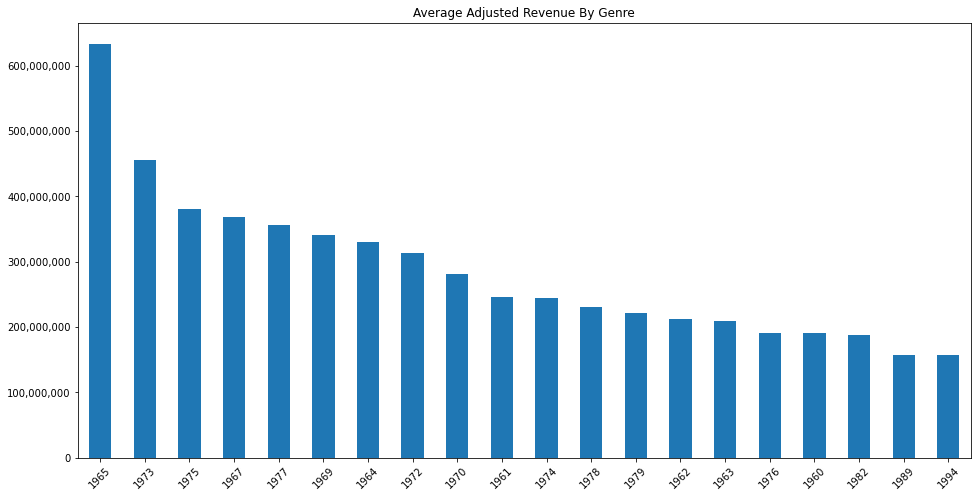

In [73]:
ax = top_20_years.plot(title='Average Adjusted Revenue By Genre', kind='bar', figsize=(16,8), legend=False)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation = 45);


In [ ]:
df.to_excel(r'D:\movies project.xlsx', index = False)
